# GROUP PROJECT


## Welcome to the COMP 247 Project - Supervising Learning Project - KSI Collisions Toronto


#### Relevant Information:
- College: Centennial College
- Program: Software Engineering Technology - Artificial Intelligence
- Term: Summer 2022
- Course: 22M --Supervised Learning (SEC. 001) - COMP247001_2022MW


### Group Members
- ., Ripudaman
- Maria, Karan
- Radmy, Mahpara Rafia
- Saenz Huerta, Ronald
- Sidhu, Manipal

### COMP 247 Project
Group Project – Developing a predictive machine learning model (classifier) and deploy it as a web API for inference

### Dataset
https://data.torontopolice.on.ca/datasets/TorontoPS::ksi/about


### Models:

- Logistic Regression
- Random Forest Classifier
- Decision Tree Classifier
- KNeighbors Classifier
- SVC

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

## Functions

### Analyze Data - Data Exploration, Stats, Plots

In [3]:
def analyze_data(data):
    
    print("\n","Data - 20 first rows")
    print(data.head(20))
    
    print("\n","Data info")
    print(data.info())
    
    print("\n","Data Shape")
    print(data.shape)
    
    print("\n","Data - Null Values")
    print(data.isnull().sum())
    
    print("\n","Data - Null Values String")
    for column in data.columns:
        print("Column:", column, " - Len:", len(data[data[column] == '<Null>']))
    
    print("\n","Data - Describe stats")
    stats = data.describe()
    print(data.describe())

    print("\n","Data - Plot histograms")
    hist = data.hist(bins=3, figsize=(9,10))
    
    print("\n","Data - Plot scatter matrix")
    pd.plotting.scatter_matrix(data, alpha=0.40, figsize=(13,8))
    
    

### Analyze Data - Unique Values

In [18]:

def analyze_data_unique_values(data, value_counts):
    
    print("\n","Data - Unique Values")
    for column in data:
        print("\n", "Column:", column, " - Len:", len(data[column].unique()), " - Values: ", data[column].unique(), "\n")
        if value_counts:
            print(data[column].value_counts())


### Cleaning Data - Replace values, Drop columns

In [19]:

def cleaning_data_initial(data):
  
    # Replace <null> with nan .
    data = data.replace('<Null>', np.nan)

    # Extract month from date and remove date column
    data['month'] = pd.DatetimeIndex(data['DATE']).month


    #BINARY COLUMNS 0: NULL 1: YES
    binary_columns=['CYCLIST','AUTOMOBILE','MOTORCYCLE','TRUCK','TRSN_CITY_VEH','EMERG_VEH','SPEEDING','AG_DRIV','REDLIGHT','ALCOHOL','DISABILITY','PEDESTRIAN','PASSENGER']
    
    for i in binary_columns:
        data[i].replace(np.nan, 0, inplace=True)
        data[i].replace("Yes", 1, inplace=True)
        data[i] = data[i].astype(int)

    # Drop columns that are not required 
    
    # A lot of different values 
    drop_columns=['INDEX_','ObjectId','ACCNUM', 'X', 'Y','STREET1', 'STREET2', 'LATITUDE', 'LONGITUDE']
    # Duplicated with HOOD_ID and POLICE_DIVISION         
    drop_columns+=['NEIGHBOURHOOD', 'DIVISION']
    # A lot of null values          
    drop_columns+=["OFFSET", "PEDTYPE", "PEDACT", "PEDCOND", "CYCLISTYPE", "CYCACT", "CYCCOND", "FATAL_NO"]
                   
    drop_columns+=['TIME', 'YEAR', 'DATE', 'WARDNUM', 'INITDIR', 'INVAGE']
      
    # DROP
    data = data.drop(drop_columns, axis=1)

    # Drop columns with null count greater than 40 % .
    data = data.dropna(axis=1,thresh=(data.shape[0]*0.6))

    # -----------------------------------------------------------------------------------------------------
    # Drop duplicates values - rows    
    data = data.drop_duplicates()
    data.nunique(axis=0)
    
    return data

### Cleaning Data - Replace values

In [68]:
 def cleaning_data_values(data):
    
    
    # -----------------------------------------------------------------------------------------------------
    # Column: ROAD_CLASS 
    
    # Replace the Ramp type with an other existing category
    data['ROAD_CLASS'].replace('Expressway Ramp', 'Expressway', inplace=True)
    data['ROAD_CLASS'].replace('Major Arterial Ramp', 'Major Arterial', inplace=True)
    
    # Replace all null values with Other category
    data['ROAD_CLASS'].replace(np.nan, 'Other', inplace=True)
    
    
    # -----------------------------------------------------------------------------------------------------
    # Column: DISTRICT 
    
    # Replace in one category Toronto and East York
    data['DISTRICT'].replace('Toronto East York', 'Toronto and East York', inplace=True)
    
    # Replace all null values with Other category
    data['DISTRICT'].replace(np.nan, 'Other', inplace=True)
    
    
    # -----------------------------------------------------------------------------------------------------
    # Column: LOCCOORD 
    
    # Replace in existing categories
    data['LOCCOORD'].replace('Mid-Block (Abnormal)', 'Mid-Block', inplace=True)
    data['LOCCOORD'].replace('Entrance Ramp Westbound', 'Exit Ramp',inplace=True)
    data['LOCCOORD'].replace('Exit Ramp Westbound', 'Exit Ramp',inplace=True)
    data['LOCCOORD'].replace('Exit Ramp Southbound','Exit Ramp',inplace=True)
    data['LOCCOORD'].replace('Park, Private Property, Public Lane', 'Other',inplace=True)
    
    # Replace all null values with Other category
    data['LOCCOORD'].replace(np.nan, 'Other', inplace=True)
    
    
    # -----------------------------------------------------------------------------------------------------
    # Column: ACCLOC 
    
    # Replace in existing categories
    data['ACCLOC'].replace('Intersection Related', 'At Intersection', inplace=True)
    data['ACCLOC'].replace('Private Driveway', 'At/Near Private Drive', inplace=True)
    
    # Replace small values in Other category
    data['ACCLOC'].replace('Laneway', 'Other', inplace=True)
    data['ACCLOC'].replace('Overpass or Bridge', 'Other', inplace=True)
    data['ACCLOC'].replace('Underpass or Tunnel', 'Other', inplace=True)
    data['ACCLOC'].replace('Trail', 'Other', inplace=True)
    
    # Replace all null values with Other category
    data['ACCLOC'].replace(np.nan, 'Other', inplace=True)
    
    
    # -----------------------------------------------------------------------------------------------------
    # Column: TRAFFCTL 
    
    # Replace small values in Other category
    data['TRAFFCTL'].replace('Traffic Controller', 'Other', inplace=True)
    data['TRAFFCTL'].replace('Yield Sign', 'Other', inplace=True)
    data['TRAFFCTL'].replace('Streetcar (Stop for)', 'Other', inplace=True)
    data['TRAFFCTL'].replace('Traffic Gate', 'Other', inplace=True)
    data['TRAFFCTL'].replace('School Guard', 'Other', inplace=True)
    data['TRAFFCTL'].replace('Police Control', 'Other', inplace=True)
    
    # Replace all null values with Other category
    data['TRAFFCTL'].replace(np.nan, 'Other', inplace=True)
    

    # -----------------------------------------------------------------------------------------------------
    # Column: VISIBILITY 
    
    # Replace in existing categories
    data['VISIBILITY'].replace('Drifting Snow', 'Snow', inplace=True)
    data['VISIBILITY'].replace('Freezing Rain', 'Rain',inplace=True)
    
    # Replace small values in Other category
    data['VISIBILITY'].replace('Strong wind', 'Other',inplace=True)
    
    # Replace all null values with Other category
    data['VISIBILITY'].replace(np.nan, 'Other', inplace=True)
    
    
    # -----------------------------------------------------------------------------------------------------
    # Column: LIGHT 
    
    # Replace in existing categories
    data['LIGHT'].replace('Dark, artificial', 'Dark',inplace=True)
    data['LIGHT'].replace('Dusk, artificial', 'Dusk',inplace=True)
    data['LIGHT'].replace('Daylight, artificial', 'Daylight',inplace=True)
    data['LIGHT'].replace('Dawn, artificial', 'Dawn',inplace=True)
    
    # Replace all null values with Other category
    data['LIGHT'].replace(np.nan, 'Other', inplace=True)

    
    # -----------------------------------------------------------------------------------------------------
    # Column: RDSFCOND 
    
    # Replace in existing categories
    data['RDSFCOND'].replace('Loose Snow', 'Snow',inplace=True)
    data['RDSFCOND'].replace('Packed Snow', 'Snow',inplace=True)
    
    # Replace small values in Other category
    data['RDSFCOND'].replace('Loose Sand or Gravel', 'Other',inplace=True)
    data['RDSFCOND'].replace('Spilled liquid', 'Other',inplace=True)
    
    # Replace all null values with Other category
    data['RDSFCOND'].replace(np.nan, 'Other', inplace=True)
    
    
    # -----------------------------------------------------------------------------------------------------
    # Column: ACCLASS 
    
    # Replace in existing categories - Property Damage Only is Non-FAtal Injury
    data['ACCLASS'].replace('Property Damage Only', 'Non-Fatal Injury',inplace=True)
    
    # Replace all null values with Non-Fatal Injury category
    data['ACCLASS'].replace(np.nan, 'Non-Fatal Injury', inplace=True)
    
    # Replace values with binary classification
    data['ACCLASS'].replace('Non-Fatal Injury', 0, inplace=True)
    data['ACCLASS'].replace('Fatal', 1, inplace=True)
    
    
    # -----------------------------------------------------------------------------------------------------
    # Column: IMPACTYPE 
    
    # Replace all null values with Non-Fatal Injury category
    data['IMPACTYPE'].replace(np.nan, 'Other', inplace=True)
    
    
    # -----------------------------------------------------------------------------------------------------
    # Column: INVTYPE 
    
    # Replace in existing categories
    data['INVTYPE'].replace('Witness', 'Pedestrian', inplace=True)
    data['INVTYPE'].replace('Pedestrian - Not Hit', 'Pedestrian', inplace=True)
    data['INVTYPE'].replace('Driver - Not Hit', 'Driver', inplace=True)
    data['INVTYPE'].replace('Cyclist', 'Cyclist Passenger', inplace=True)
    data['INVTYPE'].replace('Cyclist Passenger', 'Cyclist Passenger', inplace=True)
    data['INVTYPE'].replace('Motorcycle Driver', 'Motorcycle Passenger', inplace=True)
    data['INVTYPE'].replace('Motorcycle Passenger', 'Motorcycle Passenger', inplace=True)
    data['INVTYPE'].replace('Trailer Owner', 'Truck Driver', inplace=True)
    
    # Replace small values in Other category
    data['INVTYPE'].replace('Other Property Owner', 'Other',inplace=True)
    data['INVTYPE'].replace('Moped Driver', 'Other',inplace=True)
    data['INVTYPE'].replace('Wheelchair', 'Other',inplace=True)
    data['INVTYPE'].replace('In-Line Skater', 'Other',inplace=True)
    
    # Replace all null values with Other category
    data['INVTYPE'].replace(np.nan, 'Other', inplace=True)
    
    
    # -----------------------------------------------------------------------------------------------------
    # Column: INJURY 
    
    # Replace in existing categories
    data['INJURY'].replace('Minimal', 'Minor', inplace=True)
    
    # Replace all null values with Non-Fatal Injury category
    data['INJURY'].replace(np.nan, 'None', inplace=True)
    
    
    # -----------------------------------------------------------------------------------------------------
    # Column: VEHTYPE 
    
    # Replace all types of truck in only group called 'Truck'
    data['VEHTYPE'].replace('Truck - Open', 'Truck', inplace=True)
    data['VEHTYPE'].replace('Truck-Tractor', 'Truck', inplace=True)
    data['VEHTYPE'].replace('Truck - Closed (Blazer, etc)', 'Truck', inplace=True)
    data['VEHTYPE'].replace('Truck - Dump', 'Truck', inplace=True)
    data['VEHTYPE'].replace('Truck (other)', 'Truck', inplace=True)
    data['VEHTYPE'].replace('Truck - Tank', 'Truck', inplace=True)
    data['VEHTYPE'].replace('Pick Up Truck', 'Truck', inplace=True)
    data['VEHTYPE'].replace('Tow Truck', 'Truck', inplace=True)
    data['VEHTYPE'].replace('Truck - Car Carrier', 'Truck', inplace=True)
    
    # Replace all types of 2 wheels in only group called 2 Wheels
    data['VEHTYPE'].replace('Motorcycle', '2 Wheels', inplace=True)
    data['VEHTYPE'].replace('Bicycle', '2 Wheels', inplace=True)
    data['VEHTYPE'].replace('Moped', '2 Wheels', inplace=True)
    data['VEHTYPE'].replace('Off Road - 2 Wheels', '2 Wheels', inplace=True)

    # Replace all types of automobiles in only group called Automobile
    data['VEHTYPE'].replace('Automobile, Station Wagon', 'Automobile', inplace=True)
    data['VEHTYPE'].replace('Taxi', 'Automobile', inplace=True)
    
    # Replace all types of Emergency Vehicles in only group called Emergency
    data['VEHTYPE'].replace('Police Vehicle', 'Emergency', inplace=True)
    data['VEHTYPE'].replace('Other Emergency Vehicle', 'Emergency', inplace=True)
    data['VEHTYPE'].replace('Fire Vehicle', 'Emergency', inplace=True)
    
    # Replace all types of Buses in only group called Bus
    data['VEHTYPE'].replace('Municipal Transit Bus (TTC)', 'Bus', inplace=True)
    data['VEHTYPE'].replace('Street Cars', 'Bus', inplace=True)
    data['VEHTYPE'].replace('Street Car', 'Bus', inplace=True)
    data['VEHTYPE'].replace('Bus (Other) (Go Bus, Gray Coach)', 'Bus', inplace=True)
    data['VEHTYPE'].replace('Intercity Bus', 'Bus', inplace=True)
    data['VEHTYPE'].replace('School Bus', 'Bus', inplace=True)
    
    # Replace all types of Vans in only group called Van
    data['VEHTYPE'].replace('Passenger Van', 'Van', inplace=True)
    data['VEHTYPE'].replace('Delivery Van', 'Van', inplace=True)
    
    # Replace small values in Other category
    data['VEHTYPE'].replace('Construction Equipment', 'Other',inplace=True)
    
    # Replace all null values with Other category
    data['VEHTYPE'].replace(np.nan, 'Other', inplace=True)


    # -----------------------------------------------------------------------------------------------------
    # Column: POLICE_DIVISION 
    
    #Police Division without 'D' character    
    data['POLICE_DIVISION'] = data['POLICE_DIVISION'].str.strip("D")
    data['POLICE_DIVISION'] = data['POLICE_DIVISION'].astype(int)
        
    
    # -----------------------------------------------------------------------------------------------------
    # Drop duplicates values - rows    
    data = data.drop_duplicates()
    data.nunique(axis=0)
    

    return data

### Data Preprocessing - Get pipeline transformer, and X, Y train ant test data.

In [60]:

def get_pipeline_x_y(data=None, test_size=0.20):
    
    features_columns_categorical = ["ROAD_CLASS", "DISTRICT", "LOCCOORD", "ACCLOC", "TRAFFCTL", "VISIBILITY", "LIGHT", "RDSFCOND", "IMPACTYPE", "INVTYPE", "INJURY", "VEHTYPE"]
    features_columns_numbers = ['HOUR', 'CYCLIST','AUTOMOBILE','MOTORCYCLE','TRUCK','TRSN_CITY_VEH','EMERG_VEH','SPEEDING','AG_DRIV','REDLIGHT','ALCOHOL','DISABILITY','PEDESTRIAN','PASSENGER', 'POLICE_DIVISION', 'HOOD_ID', 'month']


    #    ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='missing')),
    #('imputer', KNNImputer(n_neighbors=2)),
    
        
    categorical_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='missing')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

    # Full pipeline - Column Transformer
    full_pipeline_transformer = ColumnTransformer([
        ("num", num_pipeline, features_columns_numbers),
        ("cat", categorical_pipeline, features_columns_categorical),
    ])

    X_group = data[features_columns_categorical + features_columns_numbers]
    Y_group = data['ACCLASS']

            
    np.random.seed(2)

    # Divide data in train/test 
    X_train, X_test, y_train, y_test = train_test_split(X_group, Y_group, test_size=test_size, random_state=0)


    return full_pipeline_transformer, X_group, Y_group, X_train, X_test, y_train, y_test


### Get Best Model - Logistic Regression, Decision Tree, Random Forest Classifier, SVC, K-Neighbors Classifier

In [61]:

def get_best_model(data, classifier_model, full_pipeline_transformer, X_train, X_test, y_train, y_test):
    
    
    # Initialze the estimators
    estimator_1 = LogisticRegression(random_state=42)
    estimator_2 = DecisionTreeClassifier(random_state=42)
    estimator_3 = RandomForestClassifier(random_state=42)
    estimator_4 = SVC(probability=True, random_state=42)
    estimator_5 = MultinomialNB()
    estimator_6 = KNeighborsClassifier()
    
    
    # Initiaze the hyperparameters for each dictionary
    if classifier_model == "LogisticRegression":

        param_grid = {
            'classifier__solver': ['lbfgs', 'saga'], 
            'classifier__max_iter': [100, 1000],
            'classifier__random_state': [0, 42], 
            'classifier__multi_class': ['auto', 'multinomial']
        }
        
        full_pipeline = Pipeline([
            ('preprocessing', full_pipeline_transformer),
            ('classifier', estimator_1),
        ])
        
        
    elif classifier_model == "DecisionTreeClassifier":
        
        #'classifier__min_samples_split': [2, 5, 10, 20], 
        #'classifier__min_samples_leaf': [1, 5, 10], 
        #'classifier__max_leaf_nodes': [None, 5, 10, 20],
            
        param_grid = {
            'classifier__criterion': ['gini', 'entropy'], 
            'classifier__max_depth': [2 ,5, 10, 25, None],
            'classifier__min_samples_split': [2],
            'classifier__min_samples_leaf': [1],
            'classifier__max_leaf_nodes': [20],
            'classifier__class_weight': [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
        }
        
        full_pipeline = Pipeline([
            ('preprocessing', full_pipeline_transformer),
            ('classifier', estimator_2),
        ])

    elif classifier_model == "RandomForestClassifier":
        
        param_grid = {
            'classifier__n_estimators': [10, 50, 100, 250], 
            'classifier__max_depth': [5,10,20],
            'classifier__class_weight': [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
        }
        
        full_pipeline = Pipeline([
            ('preprocessing', full_pipeline_transformer),
            ('classifier', estimator_3),
        ])
        
    elif classifier_model == "SVC":
        
        param_grid = {
            'classifier__kernel': ['linear', 'rbf','poly'],
            #'classifier__C': [0.01, 0.1, 1, 10, 100],
            #'classifier__class_weight': [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
            'classifier__gamma': ['auto'],
        }
                
        full_pipeline = Pipeline([
            ('preprocessing', full_pipeline_transformer),
            ('classifier', estimator_4),
        ])
    
    elif classifier_model == "MultinomialNB":
        
        param_grid = {
            'classifier__alpha': [0, 10, 100]
        }
        
        full_pipeline = Pipeline([
            ('preprocessing', full_pipeline_transformer),
            ('classifier', estimator_5),
        ])
        
    elif classifier_model == "KNeighborsClassifier":
        
        param_grid = {
            'classifier__n_neighbors': [2,5,10,25,50]
        }
        
        full_pipeline = Pipeline([
            ('preprocessing', full_pipeline_transformer),
            ('classifier', estimator_6),
        ])
        
    else:
        param_grid = [
            {
                'classifier': [estimator_1], 
                'classifier__solver': ['lbfgs', 'saga'], 
                'classifier__max_iter': [1000],
                'classifier__random_state': [0, 42], 
                'classifier__multi_class': ['auto', 'multinomial'] 
            },
            {
                'classifier': [estimator_2], 
                'classifier__criterion': ['gini'], 
                'classifier__max_depth': [5,10,25,None],
                'classifier__min_samples_split': [2,5,10], 
                'classifier__class_weight': [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
            },
            {
                'classifier': [estimator_3], 
                'classifier__n_estimators': [10, 50, 100, 250], 
                'classifier__max_depth': [5,10,20],
                'classifier__class_weight': [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
            },
            {
                'classifier': [estimator_4],
                'classifier__kernel': ['linear', 'rbf', 'poly'],
                'classifier__gamma': ['auto'],
            },
            {
                'classifier': [estimator_5], 
                'classifier__alpha': [0, 10, 100]
            },
            {
                'classifier': [estimator_6], 
                'classifier__n_neighbors': [2,5,10,25,50]
            }
        ]        
        
        full_pipeline = Pipeline([
            ('preprocessing', full_pipeline_transformer),
            ('classifier', estimator_1),
        ])
    
    print("***********************************************************")
    print("Get Best Estimator/Params of the Model for ", classifier_model)   
    
    
    gs = GridSearchCV(full_pipeline, param_grid, cv=3, n_jobs=-1, scoring='roc_auc') 
    gs.fit(X_train, y_train)

        
    print("Best Estimator:", gs.best_estimator_)
    print("Best Params:", gs.best_params_)
    print("Best Score:", gs.best_score_)
    
    # Test data performance
    print("Test Precision:",precision_score(gs.predict(X_test), y_test))
    print("Test Recall:",recall_score(gs.predict(X_test), y_test))
    print("Test ROC AUC Score:",roc_auc_score(gs.predict(X_test), y_test))
    
    print("Test Accuracy Score = ", accuracy_score(gs.predict(X_test), y_test))
    print("Test Confusion Matrix = \n", confusion_matrix(gs.predict(X_test), y_test))
    print("Test Classification Report = \n", classification_report(gs.predict(X_test), y_test))

    # CONFUSION MATRIX PLOT   
    cm = confusion_matrix(gs.predict(X_test), y_test)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # ROC AUC CURVE PLOT
    plot_roc_curve(gs, X_test, y_test) 
    plt.show()
        
    return gs
        

## Load & check the data: 

In [62]:
data = pd.read_csv('KSI.csv')

data

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,-8.844611e+06,5.412414e+06,3387730,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,...,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1
1,-8.844611e+06,5.412414e+06,3387731,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,...,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2
2,-8.816480e+06,5.434843e+06,3388101,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),3
3,-8.816480e+06,5.434843e+06,3388102,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),4
4,-8.822759e+06,5.424516e+06,3387793,892682,2006,2006/03/12 05:00:00+00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,...,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,-8.820837e+06,5.421411e+06,81509784,1636966,2020,2020/08/30 04:00:00+00,1340,13,BRIMLEY RD,BARKDENE HILLS,...,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D41,123,Cliffcrest (123),16856
16856,-8.820068e+06,5.425334e+06,81505452,1650701,2020,2020/09/01 04:00:00+00,1205,12,EGLINTON AVE E,BELLAMY RD N,...,Yes,<Null>,Yes,<Null>,<Null>,<Null>,D43,138,Eglinton East (138),16857
16857,-8.820068e+06,5.425334e+06,81505453,1650701,2020,2020/09/01 04:00:00+00,1205,12,EGLINTON AVE E,BELLAMY RD N,...,Yes,<Null>,Yes,<Null>,<Null>,<Null>,D43,138,Eglinton East (138),16858
16858,-8.820068e+06,5.425334e+06,81505454,1650701,2020,2020/09/01 04:00:00+00,1205,12,EGLINTON AVE E,BELLAMY RD N,...,Yes,<Null>,Yes,<Null>,<Null>,<Null>,D43,138,Eglinton East (138),16859


### Analyze Data - Data Exploration Stats, Histogram, Graphs


 Data - 20 first rows
               X             Y   INDEX_  ACCNUM  YEAR                    DATE  \
0  -8.844611e+06  5.412414e+06  3387730  892658  2006  2006/03/11 05:00:00+00   
1  -8.844611e+06  5.412414e+06  3387731  892658  2006  2006/03/11 05:00:00+00   
2  -8.816480e+06  5.434843e+06  3388101  892810  2006  2006/03/11 05:00:00+00   
3  -8.816480e+06  5.434843e+06  3388102  892810  2006  2006/03/11 05:00:00+00   
4  -8.822759e+06  5.424516e+06  3387793  892682  2006  2006/03/12 05:00:00+00   
5  -8.822759e+06  5.424516e+06  3387794  892682  2006  2006/03/12 05:00:00+00   
6  -8.822759e+06  5.424516e+06  3387795  892682  2006  2006/03/12 05:00:00+00   
7  -8.841082e+06  5.411337e+06  3388371  892913  2006  2006/03/12 05:00:00+00   
8  -8.841082e+06  5.411337e+06  3388372  892913  2006  2006/03/12 05:00:00+00   
9  -8.855097e+06  5.418678e+06  3389258  893251  2006  2006/03/15 05:00:00+00   
10 -8.855097e+06  5.418678e+06  3389259  893251  2006  2006/03/15 05:00:00+00   
11 -8

Column: CYCLISTYPE  - Len: 16160
Column: CYCACT  - Len: 16153
Column: CYCCOND  - Len: 16154
Column: PEDESTRIAN  - Len: 10033
Column: CYCLIST  - Len: 15081
Column: AUTOMOBILE  - Len: 1552
Column: MOTORCYCLE  - Len: 15476
Column: TRUCK  - Len: 15818
Column: TRSN_CITY_VEH  - Len: 15849
Column: EMERG_VEH  - Len: 16829
Column: PASSENGER  - Len: 10498
Column: SPEEDING  - Len: 14575
Column: AG_DRIV  - Len: 8157
Column: REDLIGHT  - Len: 15451
Column: ALCOHOL  - Len: 16121
Column: DISABILITY  - Len: 16392
Column: POLICE_DIVISION  - Len: 0
Column: HOOD_ID  - Len: 0
Column: NEIGHBOURHOOD  - Len: 0
Column: ObjectId  - Len: 0

 Data - Describe stats
                  X             Y        INDEX_        ACCNUM          YEAR  \
count  1.686000e+04  1.686000e+04  1.686000e+04  1.686000e+04  16860.000000   
mean  -8.838272e+06  5.420819e+06  3.475220e+07  2.263460e+09   2012.256168   
std    1.159490e+04  8.664361e+03  3.657126e+07  3.263836e+09      4.252797   
min   -8.865305e+06  5.402256e+06  3.36

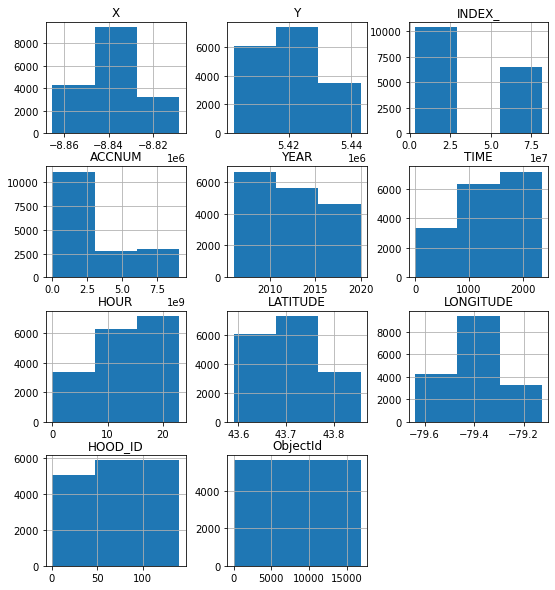

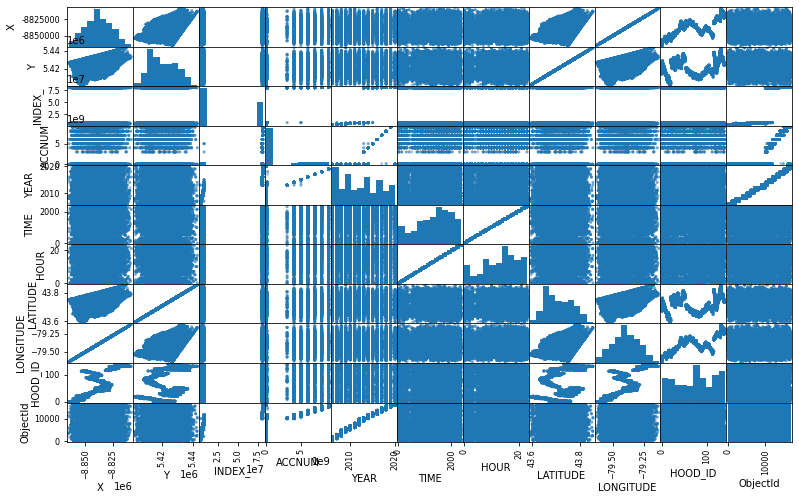

In [63]:

# Analyze data - first step
analyze_data(data)
analyze_data_unique_values(data, False)


### Cleaning Data

In [64]:

# preprocessing - clean data 
data = cleaning_data_initial(data)

### Analyze Data - Data Exploration Stats, Histogram, Graphs


 Data - 20 first rows
    HOUR      ROAD_CLASS               DISTRICT      LOCCOORD  \
0      8  Major Arterial  Toronto and East York  Intersection   
1      8  Major Arterial  Toronto and East York  Intersection   
2      9  Major Arterial            Scarborough  Intersection   
3      9  Major Arterial            Scarborough  Intersection   
4      2  Major Arterial            Scarborough     Mid-Block   
5      2  Major Arterial            Scarborough     Mid-Block   
6      2  Major Arterial            Scarborough     Mid-Block   
7     19  Major Arterial  Toronto and East York  Intersection   
8     19  Major Arterial  Toronto and East York  Intersection   
9     15  Major Arterial         Etobicoke York  Intersection   
10    15  Major Arterial         Etobicoke York  Intersection   
11     9  Major Arterial            Scarborough  Intersection   
12     9  Major Arterial            Scarborough  Intersection   
13     9  Major Arterial            Scarborough  Intersection   
14


 Data - Plot scatter matrix

 Data - Unique Values

 Column: HOUR  - Len: 24  - Values:  [ 8  9  2 19 15 17  6  3 21  7 14 11 18 16 22 23 13 12 20  5  1 10  0  4] 

18    1035
17     976
15     914
16     884
19     859
14     854
20     821
21     768
13     743
12     676
10     665
11     653
9      644
22     621
8      613
7      510
23     501
6      478
0      473
2      405
1      373
3      368
5      262
4      149
Name: HOUR, dtype: int64

 Column: ROAD_CLASS  - Len: 11  - Values:  ['Major Arterial' 'Collector' 'Minor Arterial' 'Local' nan 'Other'
 'Pending' 'Laneway' 'Expressway' 'Expressway Ramp' 'Major Arterial Ramp'] 

Major Arterial         10783
Minor Arterial          2385
Collector                866
Local                    703
Expressway                47
Other                     25
Laneway                    9
Pending                    6
Expressway Ramp            4
Major Arterial Ramp        1
Name: ROAD_CLASS, dtype: int64

 Column: DISTRICT  - Len: 6  - Valu

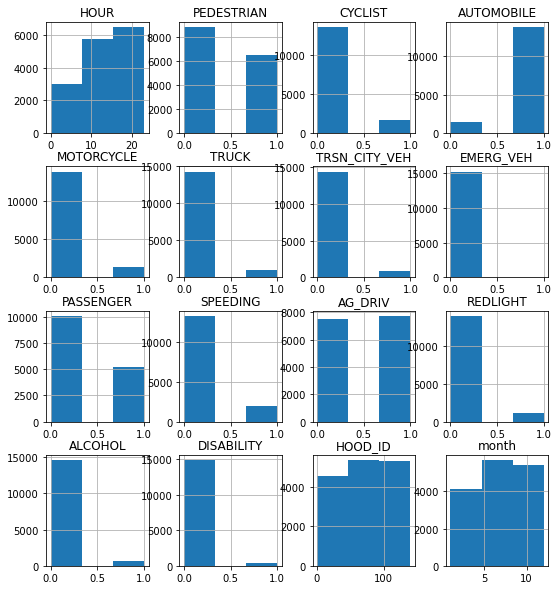

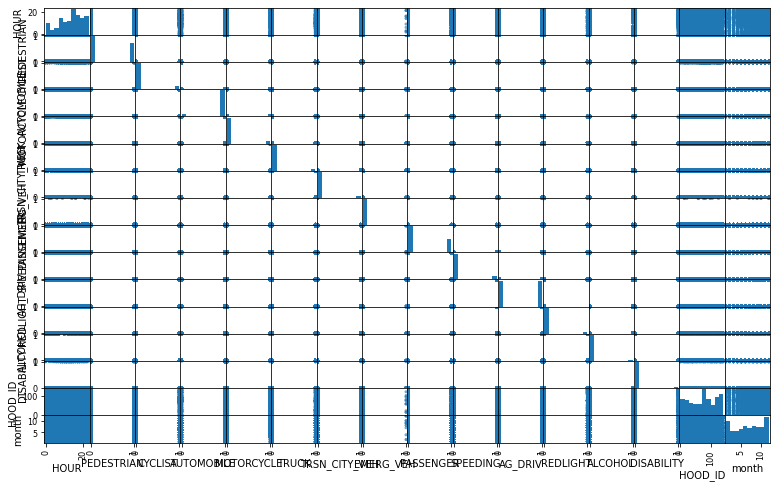

In [65]:
# Analyze data - after the first cleaning
analyze_data(data)
analyze_data_unique_values(data, True)


### Analyze Data with Power BI

##### Count of accidents


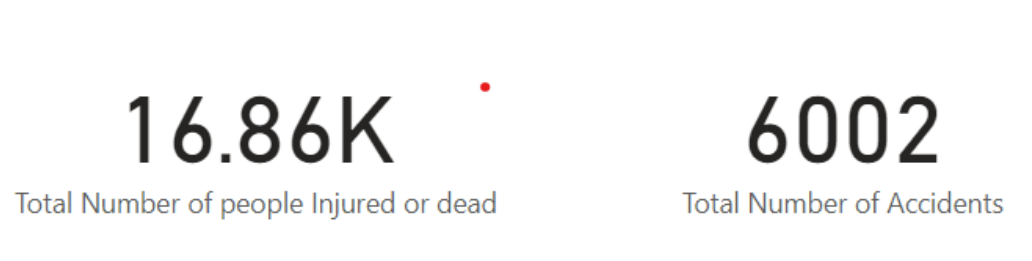

#### Relation between accidents and time

We can see that the total number of accident are high in evening hours
where as no such conclusion can be derived for fatal accident


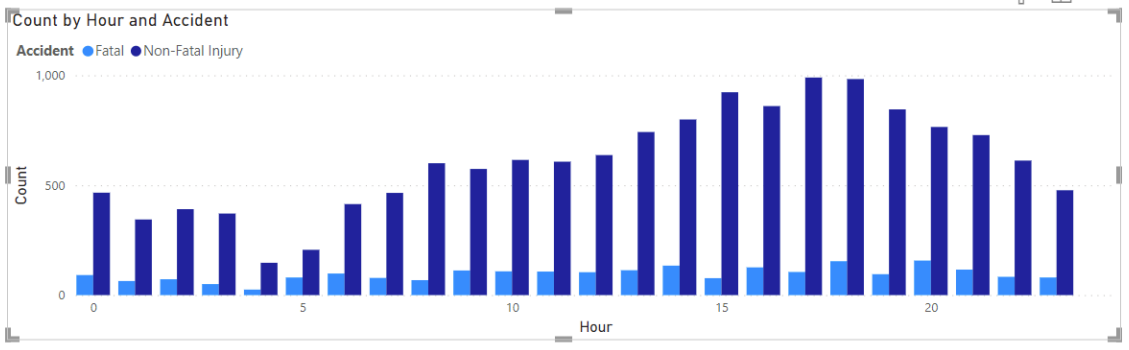

#### Percentage of accident by Light

We can see that the total number of accident are high in evening hours
where as no such conclusion can be derived for fatal accident

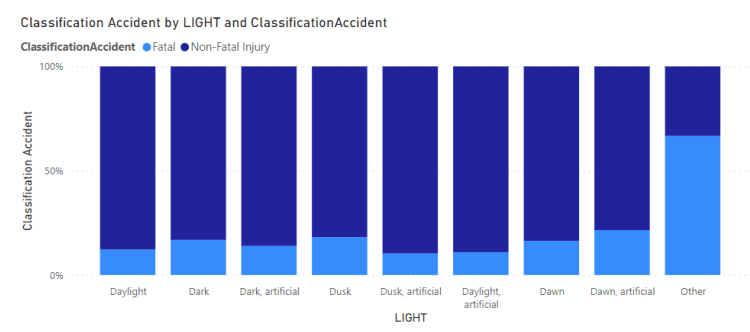

#### Percentage of accident by Road Condition


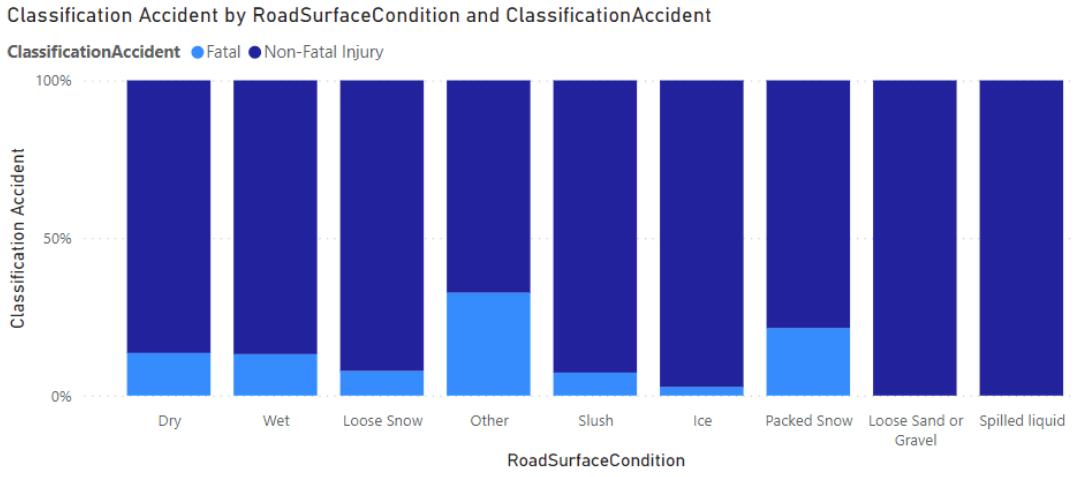

#### The Spots of all the fatal accidents

We can clearly see the hot spots

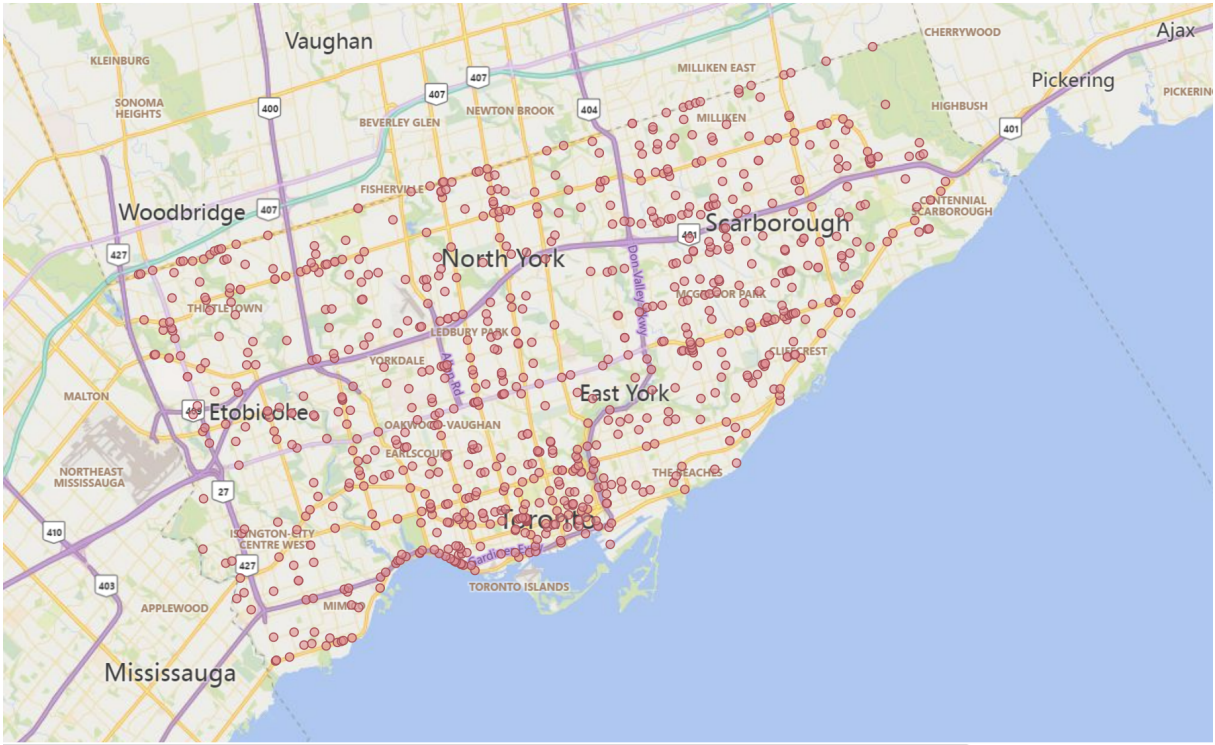

##### Counts of accident are falling

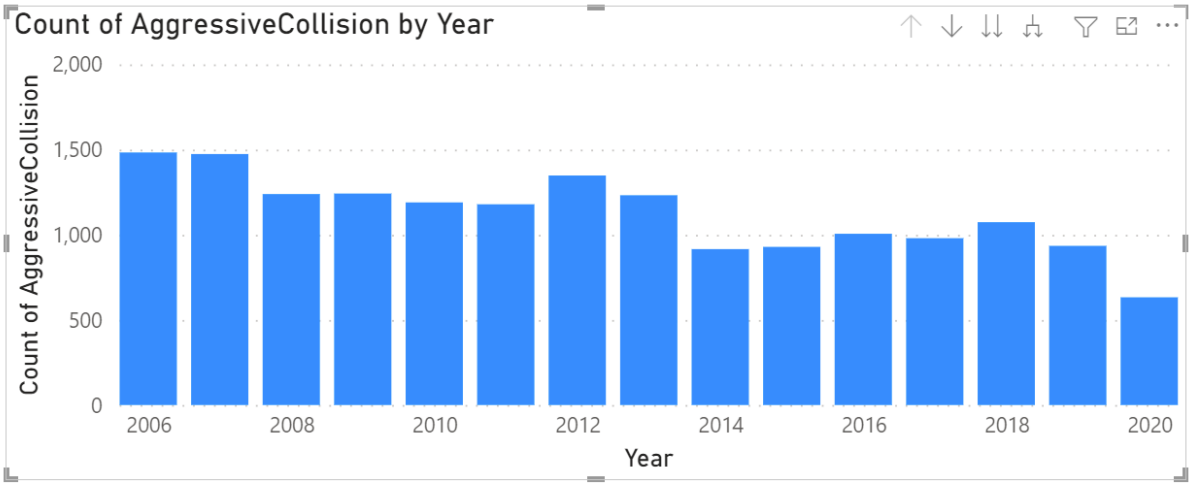

#### Correlation in the dataset

Trying to find corelation in the dataset


<AxesSubplot:>

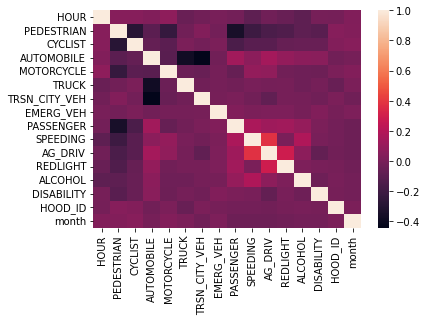

In [66]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix)


### Cleaning Data - Replace Values

In [69]:

# preprocessing - clean data 
data = cleaning_data_values(data)

### Analyze Data - Data Exploration Stats, Histogram, Graphs


 Data - 20 first rows
    HOUR      ROAD_CLASS               DISTRICT      LOCCOORD  \
0      8  Major Arterial  Toronto and East York  Intersection   
1      8  Major Arterial  Toronto and East York  Intersection   
2      9  Major Arterial            Scarborough  Intersection   
3      9  Major Arterial            Scarborough  Intersection   
4      2  Major Arterial            Scarborough     Mid-Block   
5      2  Major Arterial            Scarborough     Mid-Block   
6      2  Major Arterial            Scarborough     Mid-Block   
7     19  Major Arterial  Toronto and East York  Intersection   
8     19  Major Arterial  Toronto and East York  Intersection   
9     15  Major Arterial         Etobicoke York  Intersection   
10    15  Major Arterial         Etobicoke York  Intersection   
11     9  Major Arterial            Scarborough  Intersection   
12     9  Major Arterial            Scarborough  Intersection   
13     9  Major Arterial            Scarborough  Intersection   
14


 Data - Plot scatter matrix

 Data - Unique Values

 Column: HOUR  - Len: 24  - Values:  [ 8  9  2 19 15 17  6  3 21  7 14 11 18 16 22 23 13 12 20  5  1 10  0  4] 

18    1030
17     968
15     903
16     873
19     853
14     847
20     813
21     765
13     734
12     665
10     660
11     649
9      641
22     616
8      610
7      508
23     495
6      474
0      467
2      403
1      371
3      367
5      259
4      144
Name: HOUR, dtype: int64

 Column: ROAD_CLASS  - Len: 8  - Values:  ['Major Arterial' 'Collector' 'Minor Arterial' 'Local' 'Other' 'Pending'
 'Laneway' 'Expressway'] 

Major Arterial    10683
Minor Arterial     2367
Collector           865
Local               700
Other               435
Expressway           50
Laneway               9
Pending               6
Name: ROAD_CLASS, dtype: int64

 Column: DISTRICT  - Len: 5  - Values:  ['Toronto and East York' 'Scarborough' 'Etobicoke York' 'North York'
 'Other'] 

Toronto and East York    5191
Etobicoke York           34

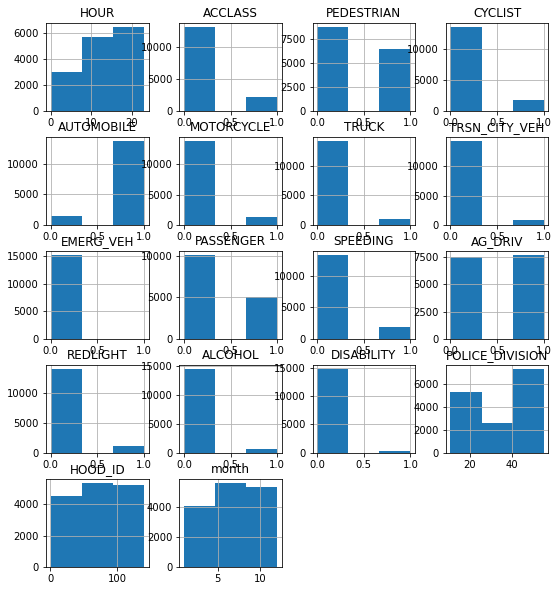

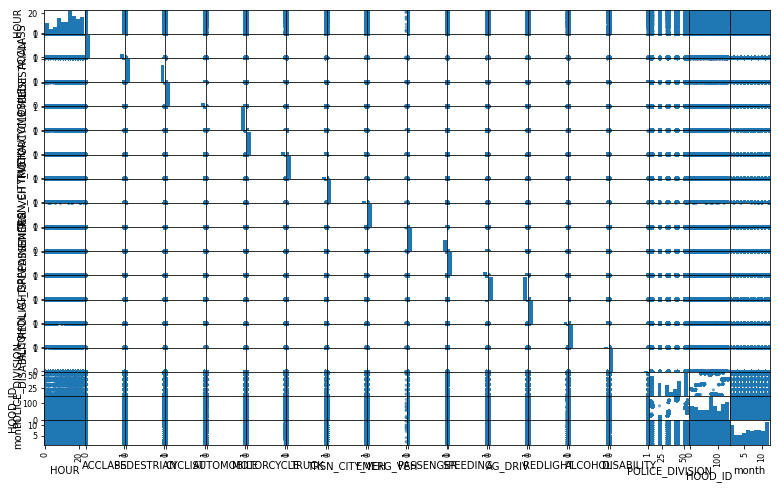

In [70]:
# Analyze data - after the second cleaning
analyze_data(data)
analyze_data_unique_values(data, True)

### Correlation of the variables

<AxesSubplot:>

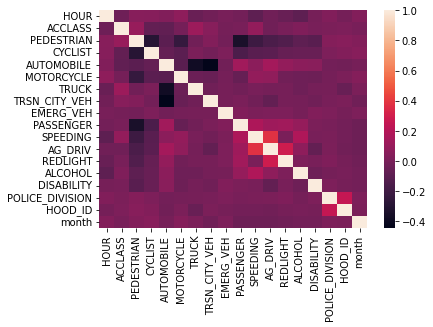

In [73]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix)


In [79]:
corr_matrix = data.corr()
corr_matrix["ACCLASS"].sort_values(ascending=False)


ACCLASS            1.000000
TRUCK              0.114711
PEDESTRIAN         0.100861
SPEEDING           0.089580
TRSN_CITY_VEH      0.048213
ALCOHOL            0.021518
HOOD_ID            0.015462
POLICE_DIVISION    0.007411
REDLIGHT          -0.000108
month             -0.001364
PASSENGER         -0.003197
DISABILITY        -0.004044
MOTORCYCLE        -0.012923
EMERG_VEH         -0.015988
AG_DRIV           -0.029194
HOUR              -0.037810
CYCLIST           -0.078454
AUTOMOBILE        -0.084198
Name: ACCLASS, dtype: float64


## Build Classification Models 


### Get full pipeline transformer and data (train and test)

In [80]:

full_pipeline_transformer, X_group, Y_group, X_train, X_test, y_train, y_test = get_pipeline_x_y(data, 0.20)

print(full_pipeline_transformer, X_group, Y_group, X_train, X_test, y_train, y_test)


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['HOUR', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE',
                                  'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
                                  'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
                                  'DISABILITY', 'PEDESTRIAN', 'PASSENGER',
                                  'POLICE_DIVISION', 'HOOD_ID', 'month']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                     


### Testing models

#### Logistic Regression

***********************************************************
Get Best Estimator/Params of the Model for  LogisticRegression
Best Estimator: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['HOUR', 'CYCLIST',
                                                   'AUTOMOBILE', 'MOTORCYCLE',
                                                   'TRUCK', 'TRSN_CITY_VEH',
                                                   'EMERG_VEH', 'SPEEDING',
                                                   'AG_DRIV', 'REDLIGHT',
                                             

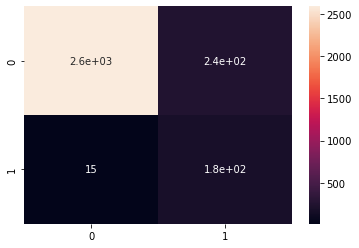

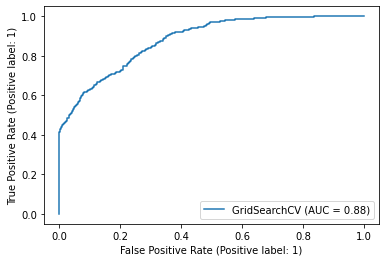

In [81]:

gs_logistic = get_best_model(data, 'LogisticRegression', full_pipeline_transformer, X_train, X_test, y_train, y_test)


#### RandomForestClassifier

***********************************************************
Get Best Estimator/Params of the Model for  RandomForestClassifier
Best Estimator: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['HOUR', 'CYCLIST',
                                                   'AUTOMOBILE', 'MOTORCYCLE',
                                                   'TRUCK', 'TRSN_CITY_VEH',
                                                   'EMERG_VEH', 'SPEEDING',
                                                   'AG_DRIV', 'REDLIGHT',
                                         

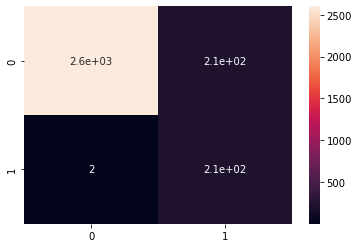

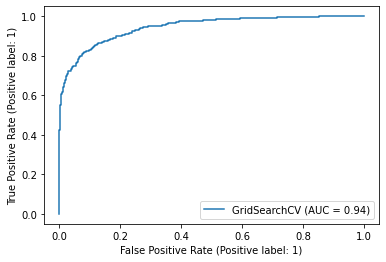

In [82]:

gs_random = get_best_model(data, 'RandomForestClassifier', full_pipeline_transformer, X_train, X_test, y_train, y_test)

#### DecisionTreeClassifier

***********************************************************
Get Best Estimator/Params of the Model for  DecisionTreeClassifier
Best Estimator: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['HOUR', 'CYCLIST',
                                                   'AUTOMOBILE', 'MOTORCYCLE',
                                                   'TRUCK', 'TRSN_CITY_VEH',
                                                   'EMERG_VEH', 'SPEEDING',
                                                   'AG_DRIV', 'REDLIGHT',
                                         

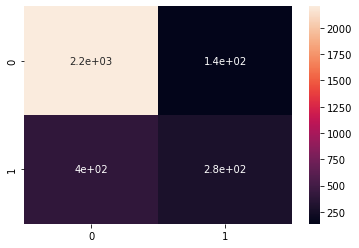

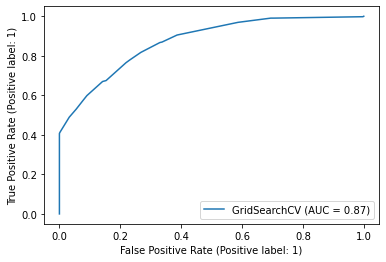

In [83]:
gs_decisiontree = get_best_model(data, 'DecisionTreeClassifier', full_pipeline_transformer, X_train, X_test, y_train, y_test)

#### KNeighborsClassifier

***********************************************************
Get Best Estimator/Params of the Model for  KNeighborsClassifier
Best Estimator: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['HOUR', 'CYCLIST',
                                                   'AUTOMOBILE', 'MOTORCYCLE',
                                                   'TRUCK', 'TRSN_CITY_VEH',
                                                   'EMERG_VEH', 'SPEEDING',
                                                   'AG_DRIV', 'REDLIGHT',
                                           

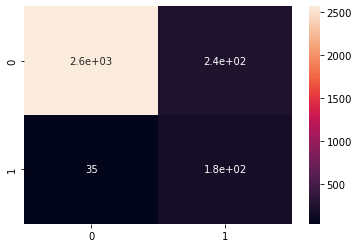

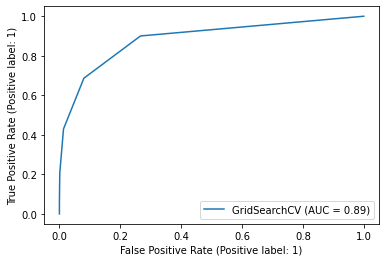

In [84]:

gs_kneighbors = get_best_model(data, 'KNeighborsClassifier', full_pipeline_transformer, X_train, X_test, y_train, y_test)

#### SVC

***********************************************************
Get Best Estimator/Params of the Model for  SVC
Best Estimator: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['HOUR', 'CYCLIST',
                                                   'AUTOMOBILE', 'MOTORCYCLE',
                                                   'TRUCK', 'TRSN_CITY_VEH',
                                                   'EMERG_VEH', 'SPEEDING',
                                                   'AG_DRIV', 'REDLIGHT',
                                                   'ALCOHOL'

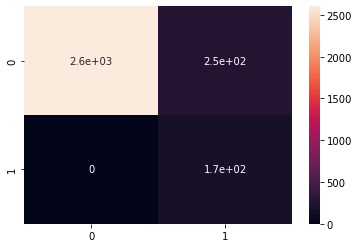

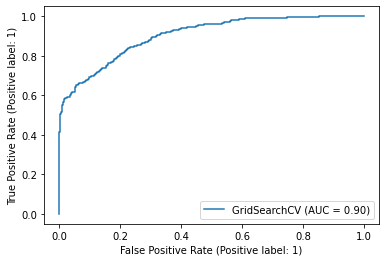

In [85]:

gs_svc = get_best_model(data, 'SVC', full_pipeline_transformer, X_train, X_test, y_train, y_test)
